In [13]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
def load_data():
    df = pd.read_csv('Average Temperature 1900-2023(1).csv')
    return df

df = load_data()
df.head()


,Year,Average_Fahrenheit_Temperature
0,1900,53.9
1,1901,53.5
2,1902,52.1
3,1903,50.6
4,1904,51.8


In [14]:
df.rename(columns={ 'Average_Fahrenheit_Temperature' : 'Temperature'}, inplace=True)
df.head()

,Year,Temperature
0,1900,53.9
1,1901,53.5
2,1902,52.1
3,1903,50.6
4,1904,51.8


In [15]:
# Step 2: Preprocess Data
def preprocess_data(df):
    df["Year"] = df["Year"].astype(int)
    df["Temperature"] = df["Temperature"].astype(float)
    return df

df = preprocess_data(df)
df.head()

,Year,Temperature
0,1900,53.9
1,1901,53.5
2,1902,52.1
3,1903,50.6
4,1904,51.8


In [16]:
# Step 3: Descriptive statistics
df.describe()

,Year,Temperature
count,124.000000,124.000000
mean,1961.500000,52.262903
std,35.939764,1.534083
min,1900.000000,48.200000
25%,1930.750000,51.175000
50%,1961.500000,52.200000
75%,1992.250000,53.500000
max,2023.000000,55.300000


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         124 non-null    int64  
 1   Temperature  124 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB
None


In [18]:
df.isnull().sum()

Year           0
Temperature    0
dtype: int64

In [19]:
df

,Year,Temperature
0,1900,53.9
1,1901,53.5
2,1902,52.1
3,1903,50.6
4,1904,51.8
...,...,...
119,2019,53.5
120,2020,53.1
121,2021,54.5
122,2022,54.0


In [20]:
temp = df['Temperature']

q1 = temp.quantile(0.25)
q3 = temp.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr    

outliers = temp[(temp < lower_bound) | (temp > upper_bound)]
print(outliers)

Series([], Name: Temperature, dtype: float64)


(array([ 2.,  0.,  0.,  4.,  2.,  4.,  8.,  8.,  8., 13., 11.,  9.,  7.,
         4., 16.,  5.,  9.,  7.,  5.,  2.]),
 array([48.2  , 48.555, 48.91 , 49.265, 49.62 , 49.975, 50.33 , 50.685,
        51.04 , 51.395, 51.75 , 52.105, 52.46 , 52.815, 53.17 , 53.525,
        53.88 , 54.235, 54.59 , 54.945, 55.3  ]),
 <BarContainer object of 20 artists>)

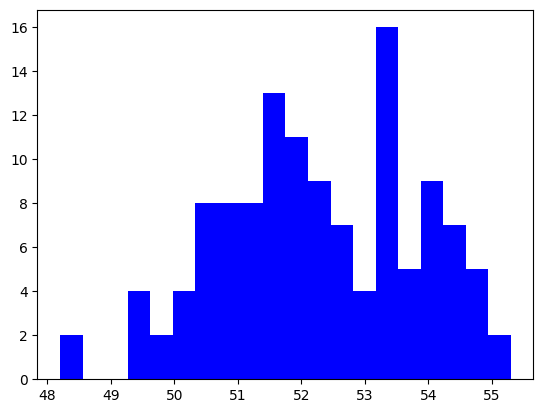

In [21]:
plt.hist(df['Temperature'], bins=20, color='blue')

Text(0.5, 1.0, 'Year vs Temperature')

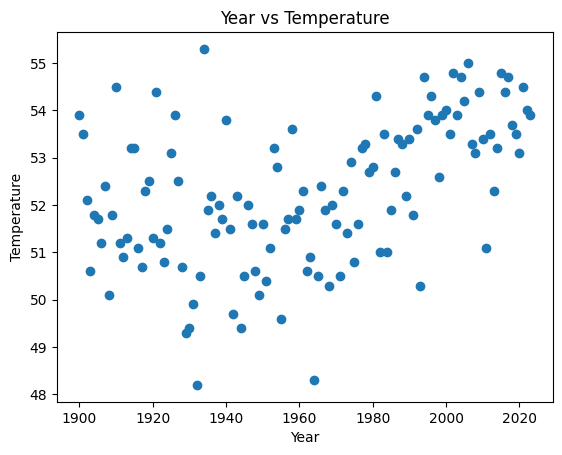

In [22]:
# Scatter plot to determine the nature of the relationship between the year and temperature

plt.scatter(df['Year'], df['Temperature'])  # Scatter plot
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Year vs Temperature')

Text(0.5, 1.0, 'Year vs Temperature')

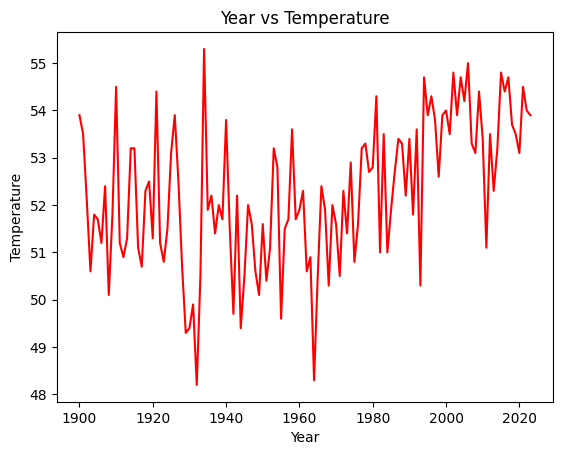

In [23]:
plt.plot(df['Year'], df['Temperature'], color='red')  # Line plot
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Year vs Temperature')

In [43]:
df_year = df.loc[df['Year'] < 2000]
df_year.reset_index(drop=True, inplace=True)
df_year
print(df_year['Temperature'].mean().round(2))

51.9


In [44]:
df_year = df.loc[df['Year'] > 2000]
df_year.reset_index(drop=True, inplace=True)
df_year
print(df_year['Temperature'].mean().round(1))


53.8


Text(0.5, 1.0, 'Year vs Temperature')

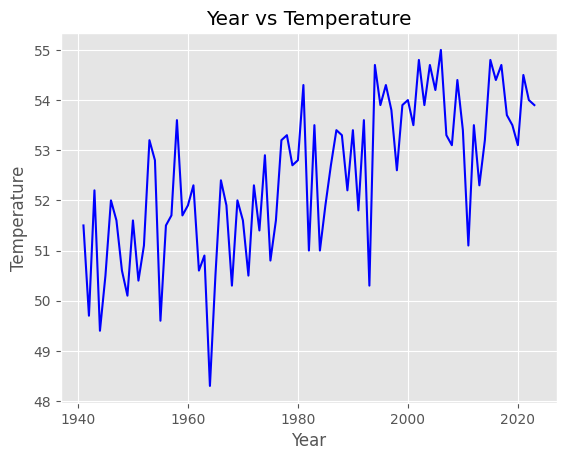

In [33]:
plt.style.use("ggplot")
plt.plot(df_year['Year'], df_year['Temperature'], color='blue' )  # Line plot
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Year vs Temperature')  

In [10]:
# Step 4: Split the data into training and testing sets
# Deciding which algorithm to use

X = df['Year'].values.reshape(-1,1)
y = df['Temperature']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor 
from sklearn.ensemble     import RandomForestRegressor
from sklearn.metrics      import mean_absolute_percentage_error , mean_squared_error ,r2_score

from math import sqrt

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]


# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, predictions)  # Calculate mean squared error
    r_score = r2_score(y_test, predictions)  # Calculate R^2 score
    print(f"{model.__class__.__name__} MSE: {mse:.2f} R^2 Score: {r_score:.2f}")

LinearRegression MSE: 2.16 R^2 Score: -0.06
DecisionTreeRegressor MSE: 2.02 R^2 Score: 0.01
RandomForestRegressor MSE: 1.72 R^2 Score: 0.15


In [11]:

# Step 3: Train Random Forest Model
def train_model(df):
    X = df[["Year"]]
    y = df["Temperature"]
    model = RandomForestRegressor()
    model.fit(X, y)
    return model

def train_model1(df):
    X = df[["Year"]]
    y = df["Temperature"]
    model = LinearRegression()
    model.fit(X, y)
    return model

def predict_future(model, start_year, end_year):
    future_years = np.array(range(start_year, end_year + 1)).reshape(-1, 1)
    predictions = model.predict(future_years)
    predictions = np.round(predictions, 2)
    return future_years, predictions

In [12]:
# Step 4: Make Predictions (Random Forest Model)

future = predict_future(train_model1(df), 2024, 2030)
print(future)

(array([[2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030]]), array([53.48, 53.5 , 53.52, 53.54, 53.56, 53.58, 53.6 ]))


C:\Users\steph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# Make Predictions (Linear Regression)

future = predict_future(train_model(df), 2024, 2030)
print(future)

(array([[2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030]]), array([53.98, 53.98, 53.98, 53.98, 53.98, 53.98, 53.98]))


C:\Users\steph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
